pm.__version__='4.4.0'


/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_48123/1960959299.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


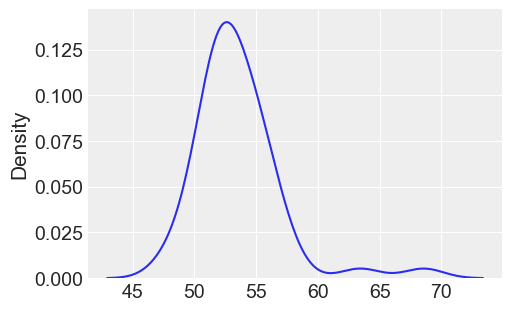

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc as pm
import arviz as az
import pandas as pd 
print(f"{pm.__version__=}")
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
az.style.use("arviz-darkgrid")
pd.set_option("display.precision", 2)
rng = np.random.default_rng(42)

data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 
    55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 
    57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94,
    54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84,
    53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16
])

plt.figure(figsize=(5,3))
sns.kdeplot(data)
plt.savefig("img302.png")

In [20]:
with pm.Model() as model_g:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sigma=10)
    # y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    idata = pm.sample_prior_predictive(samples=100, random_seed=rng)

    # step = pm.Slice()
    trace_g = pm.sample(1100)
    # chain_g = trace_g[100:]

# chain_g = trace_g[1]
# pm.traceplot(chain_g)

Sampling: [mu, sigma, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_100 draw iterations (4_000 + 4_400 draws total) took 1 seconds.


In [21]:
# plt.figure(figsize=(5,3))
# az.plot_posterior(trace_g)
# az.plot_forest(trace_g, r_hat=True)

In [22]:
df = pm.summary(trace_g)   # az.summary(trace_g)でも可
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.51,0.51,52.58,54.48,8.00e-03,6.00e-03,4206.0,2817.0,1.0
sigma,3.55,0.38,2.86,4.25,6.00e-03,4.00e-03,4154.0,3053.0,1.0


Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 30 tune and 300 draw iterations (120 + 1_200 draws total) took 0 seconds.


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>]], dtype=object)

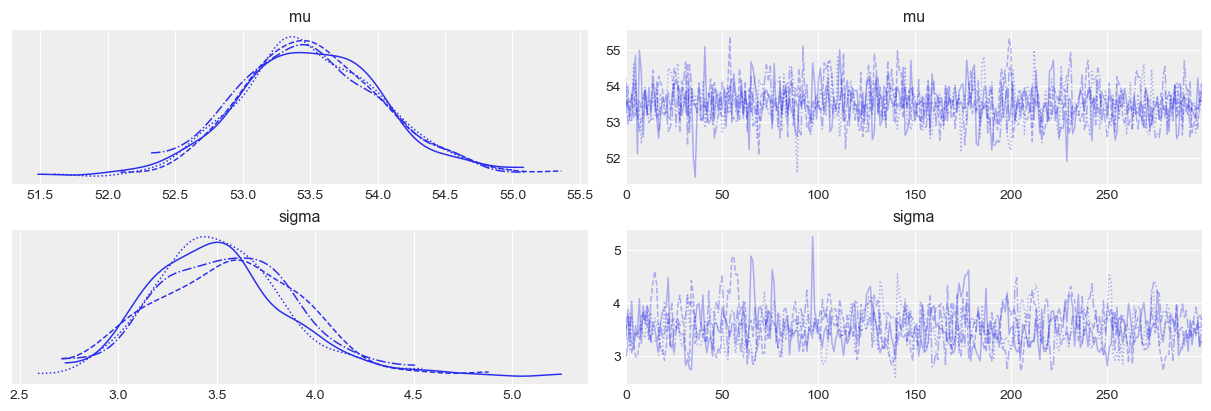

In [23]:
with model_g:
    idata.extend(pm.sample(300, tune=30, random_seed=rng))

az.plot_trace(idata)

In [24]:
with model_g:
    pm.sample_posterior_predictive(idata, 
                                   extend_inferencedata=True,
                                   random_seed=rng,
                                #    var_names=["mu", "sigma"],
                                   )
# az.plot_ppc(az.from_pymc3(posterior_predictive=y_pred, model=model_g))
# print(y_pred["posterior_predictive"]["mu"].shape)
# print(y_pred.keys())
idata.posterior_predictive

Sampling: [y]


<xarray.Dataset>
Dimensions:  (chain: 4, draw: 300, y_dim_2: 48)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * y_dim_2  (y_dim_2) int64 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47
Data variables:
    y        (chain, draw, y_dim_2) float64 53.66 58.41 53.28 ... 56.47 55.8
Attributes:
    created_at:                 2022-12-04T07:34:29.152256
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  4.4.0

array([<AxesSubplot: xlabel='y / y', ylabel='Density'>], dtype=object)

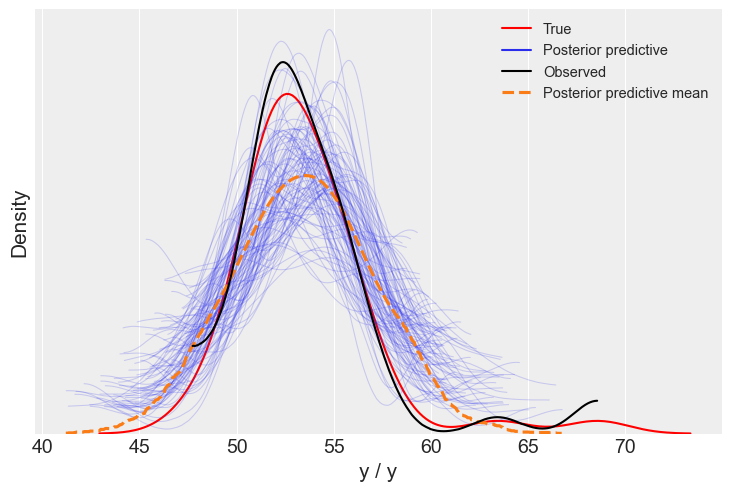

In [25]:
fig, ax = plt.subplots()
sns.kdeplot(data, c="r", ax=ax, label="True")
az.plot_ppc(idata, num_pp_samples=100, ax=ax)

In [26]:
np.mean(stats.t(loc=0, scale=1, df=1).rvs(100))

1.612864007849058

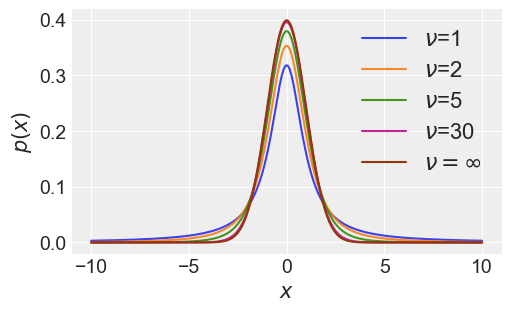

In [27]:
plt.figure(figsize=(5,3))
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, 
             label=r"$\nu$={}".format(df),
             alpha=0.9)

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu=\infty$')
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(loc=0, fontsize=16)

### t分布を含むモデルのKDEとトレースプロット


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 4 chains for 100 tune and 1_100 draw iterations (400 + 4_400 draws total) took 1 seconds.
Sampling: [mu, nu, sigma, y]


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.01,0.39,52.29,53.74,7.00e-03,5.00e-03,3141.0,3241.0,1.00
sigma,2.20,0.41,1.45,2.94,1.30e-02,9.00e-03,1070.0,1206.0,1.01
nu,4.90,4.92,1.16,10.77,2.43e-01,1.72e-01,560.0,575.0,1.02


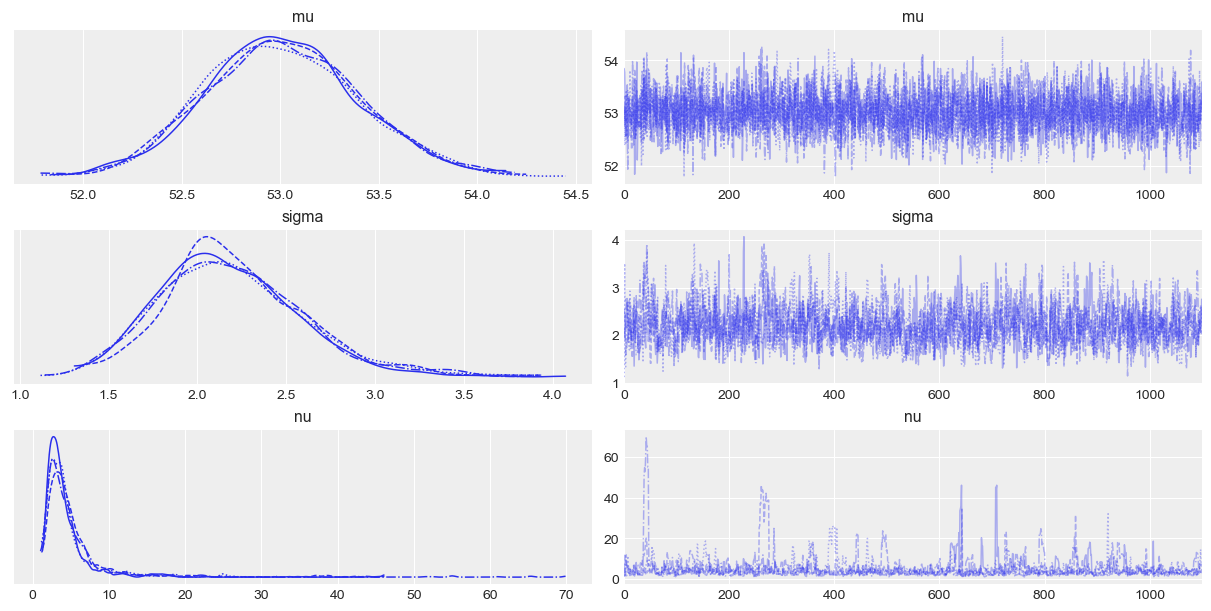

In [28]:
nburn=100
with pm.Model() as model_t:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sigma=10)
    nu = pm.Exponential("nu", 1/30)
    y = pm.StudentT("y", mu=mu, sigma=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100, tune=nburn, discard_tuned_samples=True)
    idata = pm.sample_prior_predictive(samples=100, random_seed=rng)

az.plot_trace(trace_t)
pm.summary(trace_t)

### データのKDEと100組の事後予測サンプルのKDE


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 0 seconds.


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sigma'}>,
        <AxesSubplot: title={'center': 'sigma'}>],
       [<AxesSubplot: title={'center': 'nu'}>,
        <AxesSubplot: title={'center': 'nu'}>]], dtype=object)

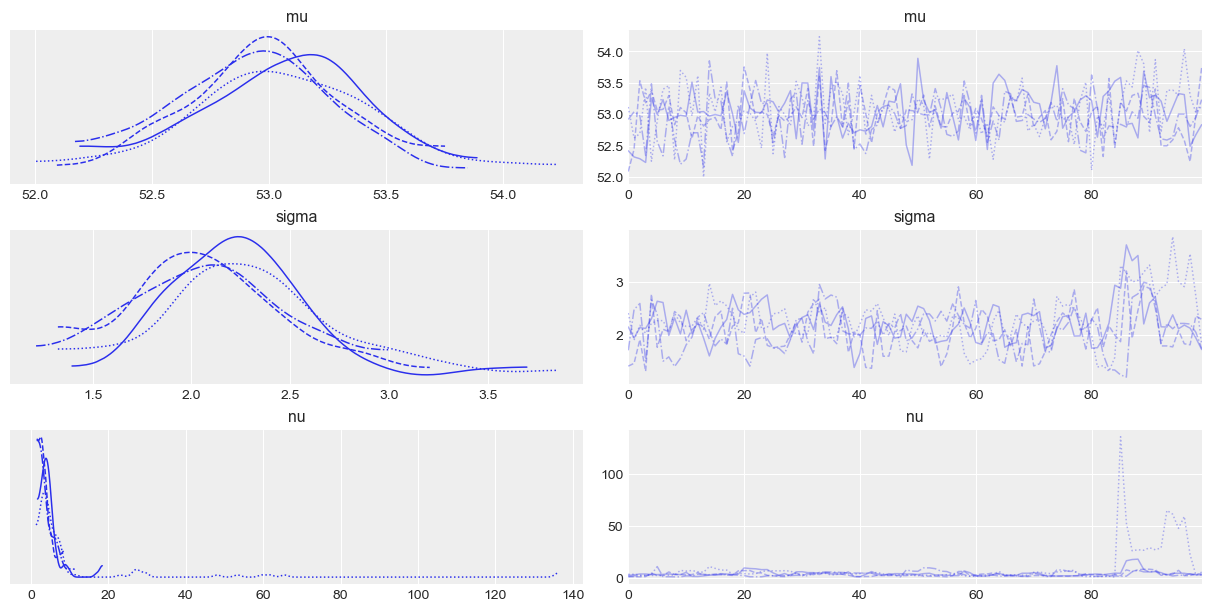

In [29]:
with model_t:
    idata.extend(pm.sample(100, tune=100, random_seed=rng))

az.plot_trace(idata)

In [30]:
with model_t:
    pm.sample_posterior_predictive(idata, 
                                   extend_inferencedata=True,
                                   random_seed=rng,
                                   # var_names=["mu", "sigma", "nu"],
                                   )
idata.posterior_predictive

Sampling: [y]


<xarray.Dataset>
Dimensions:  (chain: 4, draw: 100, y_dim_2: 48)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * y_dim_2  (y_dim_2) int64 0 1 2 3 4 5 6 7 8 9 ... 39 40 41 42 43 44 45 46 47
Data variables:
    y        (chain, draw, y_dim_2) float64 51.89 50.78 54.79 ... 52.25 52.82
Attributes:
    created_at:                 2022-12-04T07:34:36.334250
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  4.4.0

array([<AxesSubplot: xlabel='y / y', ylabel='Density'>], dtype=object)

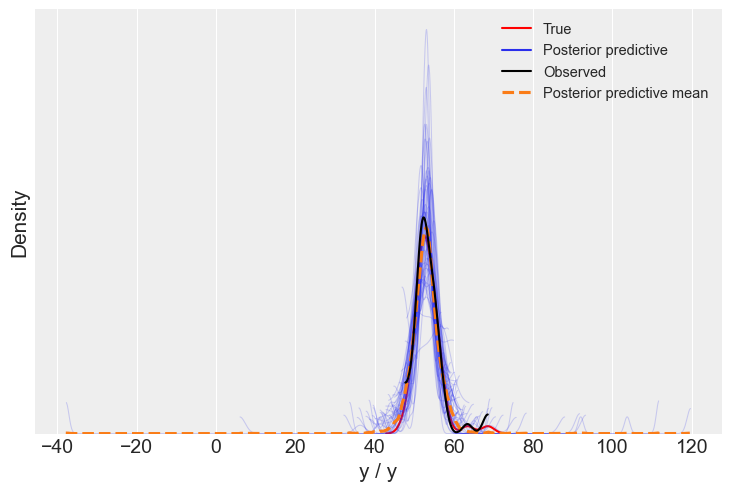

In [31]:
fig, ax = plt.subplots()
sns.kdeplot(data, c="r", ax=ax, label="True")
az.plot_ppc(idata, num_pp_samples=60, ax=ax)

## Comparison between group
- 

In [32]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


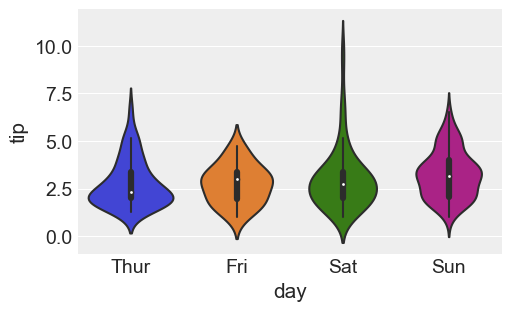

In [33]:
plt.figure(figsize=(5,3))
sns.violinplot(x="day", y="tip", data=tips)
plt.savefig("img310.png")

In [34]:
y = tips["tip"].values
idx = pd.Categorical(tips["day"]).codes

print(f"{y[:10]=}")
print(f"{idx[:10]=}")
print(f"{np.unique(idx)=}")

y[:10]=array([1.01, 1.66, 3.5 , 3.31, 3.61, 4.71, 2.  , 3.12, 1.96, 3.23])
idx[:10]=array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int8)
np.unique(idx)=array([0, 1, 2, 3], dtype=int8)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [means, sds]


Sampling 4 chains for 100 tune and 5_000 draw iterations (400 + 20_000 draws total) took 3 seconds.
Sampling: [means, sds, y]


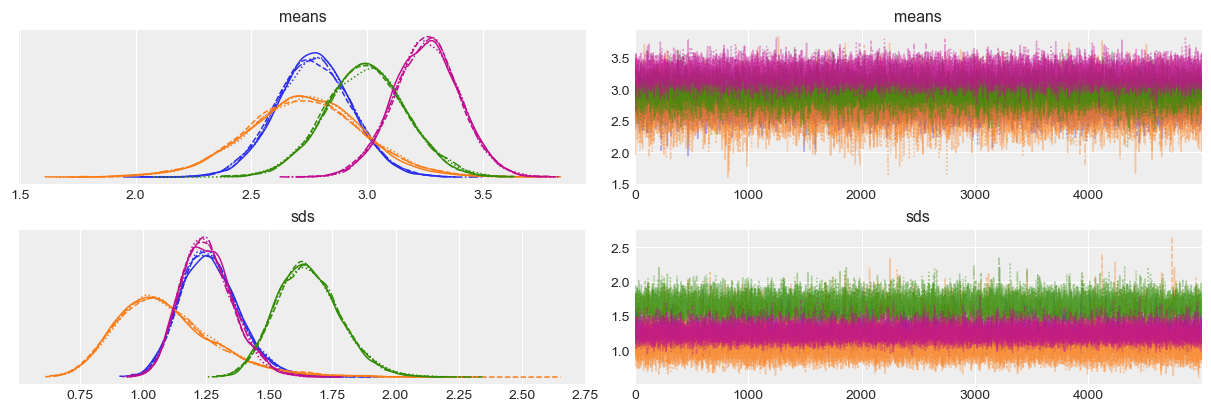

In [35]:
with pm.Model() as comparing_groups:
    means = pm.Normal("means", mu=0, sigma=10, shape=len(set(idx)))
    sds = pm.HalfNormal("sds", sigma=10, shape=len(set(idx)))
    y = pm.Normal("y", mu=means[idx], sigma=sds[idx], observed=y)

    trace_cg = pm.sample(draws=5000, tune=nburn, discard_tuned_samples=True)
    # chain_cg = trace_cg[100::]  # 後で可視化するために使う
    idata = pm.sample_prior_predictive(samples=2000, random_seed=rng)

az.plot_trace(trace_cg)
plt.savefig("img311.png")

In [75]:
print(f"{trace_cg.keys()=}")
az.summary(trace_cg)

trace_cg.keys()=KeysView(Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
means[0],2.77,0.16,2.47,3.08,1.00e-03,1.00e-03,22721.0,14426.0,1.0
means[1],2.73,0.25,2.26,3.22,3.00e-03,2.00e-03,8183.0,9147.0,1.0
means[2],2.99,0.17,2.66,3.32,1.00e-03,1.00e-03,17558.0,13891.0,1.0
means[3],3.25,0.14,2.98,3.52,1.00e-03,1.00e-03,27516.0,15342.0,1.0
sds[0],1.27,0.12,1.05,1.48,1.00e-03,0.00e+00,32839.0,15686.0,1.0
sds[1],1.10,0.20,0.75,1.47,2.00e-03,1.00e-03,17519.0,13488.0,1.0
sds[2],1.66,0.13,1.42,1.89,1.00e-03,1.00e-03,26594.0,14675.0,1.0
sds[3],1.26,0.11,1.07,1.46,1.00e-03,0.00e+00,27395.0,14554.0,1.0


In [78]:
# chain_cg = trace_cg[100, :, :]  # 後で可視化するために使う
print(trace_cg["posterior"]["means"][:,3])
print(trace_cg["means", 100:])

<xarray.DataArray 'means' (chain: 4, means_dim_0: 4)>
array([[2.6 , 3.36, 3.13, 3.15],
       [2.74, 2.82, 3.07, 3.48],
       [2.89, 2.44, 2.8 , 3.43],
       [2.66, 2.66, 3.26, 3.02]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
    draw         int64 3
  * means_dim_0  (means_dim_0) int64 0 1 2 3


KeyError: ('means', slice(100, None, None))

(i,j)=(0, 1), (k,l)=(0, 0)
(i,j)=(0, 2), (k,l)=(0, 1)
(i,j)=(0, 3), (k,l)=(1, 0)
(i,j)=(1, 2), (k,l)=(1, 1)
(i,j)=(1, 3), (k,l)=(2, 0)
(i,j)=(2, 3), (k,l)=(2, 1)


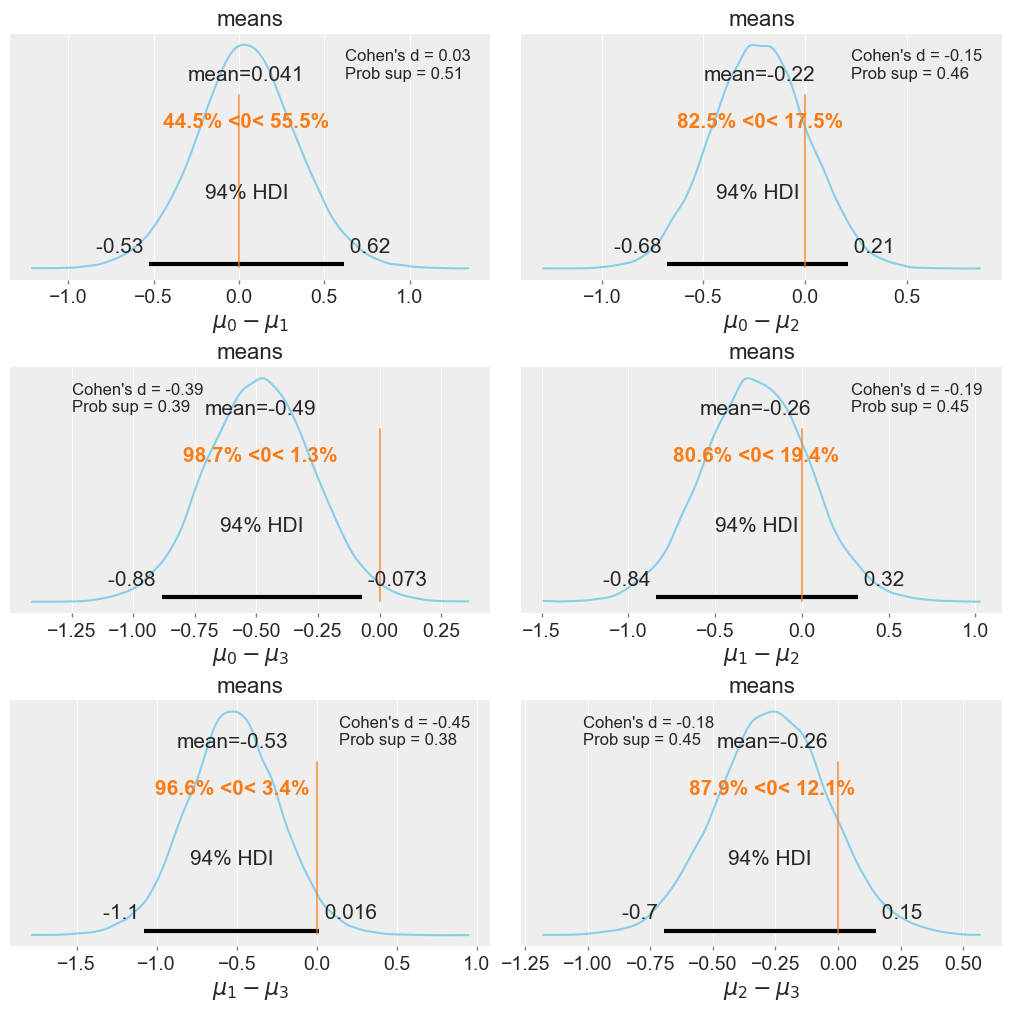

In [84]:
dist = dist = stats.norm()
_, ax = plt.subplots(3, 2, figsize=(10, 10))

comparisons = [(i,j) for i in range(len(set(idx))) for j in range(i+1, 4)]
pos = [(k,l) for k in range(3) for l in (0, 1)]

for (i,j), (k,l) in zip(comparisons, pos):
    print(f"{(i,j)=}, {(k,l)=}")
    # print(trace_cg["posterior"]["means"].shape)
    means_diff = trace_cg["posterior"]["means"][:,:,i] - trace_cg["posterior"]["means"][:,:,j]
    
    d_cohen = (means_diff / np.sqrt((trace_cg["posterior"]["sds"][:,:,i]**2 + trace_cg["posterior"]["sds"][:,:,j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))

    # # ヒストグラム、KDE plot
    pm.plot_posterior(means_diff, ref_val=0, ax=ax[k,l], color="skyblue", kind="kde")
    ax[k,l].plot(0, label=f"Cohen's d = {d_cohen:.2f} \nProb sup = {ps:.2f}", alpha=0)
    ax[k,l].set_xlabel(f"$\mu_{i}-\mu_{j}$", fontsize=16)
    ax[k,l].legend(loc=0, fontsize=12)
    # ax[k,l].set_xlim([-1.5, 1.5])
    # ヒストグラム
    # 
    

In [85]:
trace_cg.keys()

KeysView(Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data)

In [86]:
trace_cg["posterior"]["means"]

<xarray.DataArray 'means' (chain: 4, draw: 5000, means_dim_0: 4)>
array([[[3.05, 2.72, 3.17, 3.39],
        [2.63, 2.91, 2.92, 3.18],
        [2.68, 3.05, 3.04, 3.32],
        ...,
        [2.79, 2.63, 2.85, 3.35],
        [2.52, 2.47, 2.98, 3.41],
        [2.48, 2.74, 2.87, 3.58]],

       [[2.92, 2.73, 3.56, 3.17],
        [2.78, 2.45, 3.22, 3.38],
        [2.83, 2.36, 3.34, 3.17],
        ...,
        [2.91, 2.89, 2.97, 3.22],
        [2.75, 2.74, 3.11, 3.13],
        [2.94, 2.7 , 2.71, 3.37]],

       [[2.66, 2.87, 3.14, 3.09],
        [2.64, 2.74, 2.71, 2.94],
        [2.83, 2.37, 2.69, 3.34],
        ...,
        [2.76, 2.64, 2.97, 3.56],
        [2.77, 2.91, 2.99, 2.98],
        [2.61, 2.64, 2.96, 3.29]],

       [[2.69, 2.54, 3.01, 3.44],
        [2.92, 2.9 , 2.87, 3.19],
        [2.92, 2.94, 2.86, 3.48],
        ...,
        [2.84, 2.23, 2.99, 3.27],
        [2.95, 2.02, 3.09, 3.19],
        [2.62, 2.97, 2.8 , 3.51]]])
Coordinates:
  * chain        (chain) int64 0 1 2 3
  * draw         (draw) int64 0 1 2 3 4 5 6 ... 4994 4995 4996 4997 4998 4999
  * means_dim_0  (means_dim_0) int64 0 1 2 3